# <font color='green'>COLLBORATIVE PROJECT AT SENECA COLLEGE</font>
# <font color='blue'>AMAZON CUSTOMERS' REVIEWS</font>


*Date Created  November 2022*

1. Problems to solve:

Customers' reviews are a good source of data to understand customer experience, to reinforce what a business has been doing well and to improve what has not been so great, ultimately, it helps to retain customers and attract more to improve profit. 

However, business usually do not have enough resources to analyze its customers' review as these are text data and it can take tremendous time to drill down and extract insights. 

Therefore, the outcome of this project aims to assist with that process.

Let's dive in

2. Input

The data set is collected from Kaggle. It is about customers' review of technology device purchase on Amazon.

In [60]:
#Import dataset

df = pd.read_csv(r"C:\Users\huong\OneDrive\Máy tính\3. SENECA\BAN200 - Sentiment Analysis and Text Mining\amazon_reviews.csv")

df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [59]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# <font color='blue'>Data Cleaning and Preparation

In [61]:
#Drop unused columns
#We will run sentiment analysis for reviews under "reviewText" columns, hence, we will drop unrelated data

df.drop(["day_diff","helpful_yes","helpful_no","total_vote","score_pos_neg_diff","score_average_rating","wilson_lower_bound"], axis='columns', inplace = True)

df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime
0,0,NaN,4,No issues.,2014-07-23
1,1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25
2,2,1K3,4,it works as expected. I should have sprung for...,2012-12-23
3,3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013-07-13
...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23
4911,4911,Zo,5,Used this for extending the capabilities of my...,2013-08-22
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,2014-03-31
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,2013-09-16


In [62]:
#Remove puntuations. 
#In sentiment analysis, punctuations like commas, exclamation marks, do not carry much meaning or sentiment; but may affect the result

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df=df.astype(str)
df["reviewText_new"] = df['reviewText'].apply(remove_punctuations)

df


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,reviewText_new
0,0,nan,4,No issues.,2014-07-23,No issues
1,1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25,Purchased this for my device it worked as adve...
2,2,1K3,4,it works as expected. I should have sprung for...,2012-12-23,it works as expected I should have sprung for ...
3,3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21,This think has worked out greatHad a diff bran...
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013-07-13,Bought it with Retail Packaging arrived legit ...
...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,I bought this Sandisk 16GB Class 10 to use wit...
4911,4911,Zo,5,Used this for extending the capabilities of my...,2013-08-22,Used this for extending the capabilities of my...
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,2014-03-31,Great card that is very fast and reliable It c...
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,2013-09-16,Good amount of space for the stuff I want to d...


In [63]:
#Change data under reviewText_new to lowercase. Reasons: for standardization, consistency and effiency

df["reviewText_new"] = df["reviewText_new"].str.lower()

df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,reviewText_new
0,0,nan,4,No issues.,2014-07-23,no issues
1,1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25,purchased this for my device it worked as adve...
2,2,1K3,4,it works as expected. I should have sprung for...,2012-12-23,it works as expected i should have sprung for ...
3,3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21,this think has worked out greathad a diff bran...
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013-07-13,bought it with retail packaging arrived legit ...
...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,i bought this sandisk 16gb class 10 to use wit...
4911,4911,Zo,5,Used this for extending the capabilities of my...,2013-08-22,used this for extending the capabilities of my...
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,2014-03-31,great card that is very fast and reliable it c...
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,2013-09-16,good amount of space for the stuff i want to d...


In [64]:
#Remove stop words. Reasons: for better speed, accuracy and relavance.
#For this task, I will create my list of stopwords and let the text run through and be removed

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
df['reviewText_new'] = df['reviewText_new'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,reviewText_new
0,0,nan,4,No issues.,2014-07-23,no issues
1,1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25,purchased device worked advertised never much ...
2,2,1K3,4,it works as expected. I should have sprung for...,2012-12-23,works expected sprung higher capacity think ma...
3,3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21,think worked greathad diff bran 64gb card went...
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013-07-13,bought retail packaging arrived legit orange e...


In [65]:
#Tokenization: this is an important step of breaking text data or string into small piece or we call them tokens, that helps process Sentiment Analysis and accuracy

df['reviewtext_tokenized'] = df['reviewText_new'].apply(lambda x: x.split(' '))
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,reviewText_new,reviewtext_tokenized
0,0,nan,4,No issues.,2014-07-23,no issues,"[no, issues]"
1,1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25,purchased device worked advertised never much ...,"[purchased, device, worked, advertised, never,..."
2,2,1K3,4,it works as expected. I should have sprung for...,2012-12-23,works expected sprung higher capacity think ma...,"[works, expected, sprung, higher, capacity, th..."
3,3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21,think worked greathad diff bran 64gb card went...,"[think, worked, greathad, diff, bran, 64gb, ca..."
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013-07-13,bought retail packaging arrived legit orange e...,"[bought, retail, packaging, arrived, legit, or..."
...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,bought sandisk 16gb class 10 use htc inspire 3...,"[bought, sandisk, 16gb, class, 10, use, htc, i..."
4911,4911,Zo,5,Used this for extending the capabilities of my...,2013-08-22,used extending capabilities samsung galaxy not...,"[used, extending, capabilities, samsung, galax..."
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,2014-03-31,great card fast reliable comes optional adapte...,"[great, card, fast, reliable, comes, optional,..."
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,2013-09-16,good amount space stuff want fits gopro say,"[good, amount, space, stuff, want, fits, gopro..."


# <font color='blue'>Exploratory Data Analysis

In [66]:
# All columns within the dataset. There are no missing values, total of 4915 observations

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            4915 non-null   object
 1   reviewerName          4915 non-null   object
 2   overall               4915 non-null   object
 3   reviewText            4915 non-null   object
 4   reviewTime            4915 non-null   object
 5   reviewText_new        4915 non-null   object
 6   reviewtext_tokenized  4915 non-null   object
dtypes: object(7)
memory usage: 268.9+ KB


In [67]:
#Shape

df.shape

(4915, 7)

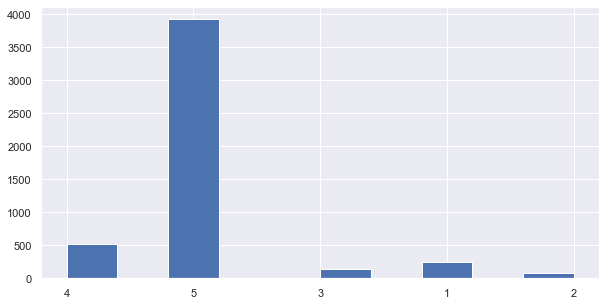

In [68]:
#Histogram of overall rating column. Overall there are around 4500 ratings over 4 points among > 4900 of reviews- good signs

plt.figure(figsize=(10,5))
plt.hist(df['overall'])
plt.show()

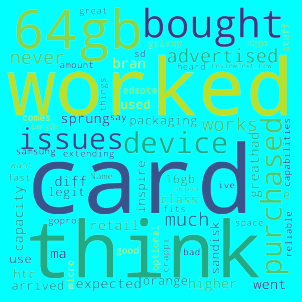

In [69]:
#Create a WordCloud

!pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS

wordcl = WordCloud(width=800, height=800, min_font_size = 10, max_words=100, collocations=False, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(str(df['reviewText_new']))
plt.figure(figsize = (6, 4), facecolor = 'cyan')
plt.imshow(wordcl)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Insights: there seems to have a high demand on Card, hence if Amazon wish to improve customer experience, then Card should be their next segment to dive deep in and improve further. Investing in different segment that does not attract customers will be unwise.

Customers emphasized a lot that their purchase worked - good indication and should keep it up. Being functional should be the focus when selling tech devices.

Think is a popular word to express only

In [70]:
#Running bigram

import nltk 
from nltk.util import ngrams
text=list(df['reviewText_new'])
text=' '.join(text)
n=2
sentence=text[:103]
unigrams = ngrams(sentence.split(),n)
for item in unigrams:
    print(item)

('no', 'issues')
('issues', 'purchased')
('purchased', 'device')
('device', 'worked')
('worked', 'advertised')
('advertised', 'never')
('never', 'much')
('much', 'phone')
('phone', 'memory')
('memory', 'since')
('since', 'download')
('download', 'lot')
('lot', 'stuff')
('stuff', 'no')
('no', 'braine')


# <font color='blue'>Sentiment Analysis

In [71]:
#Sentiment polarity
##Installing libraries

!pip install -U textblob
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\huong\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\huong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\huong\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\huong\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [72]:
from textblob import TextBlob

#Getting the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Getting the polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#Creating columns for subjectivity and polarity
df['subjectivity']=df['reviewText_new'].apply(getSubjectivity)
df['polarity']=df['reviewText_new'].apply(getpolarity)

#Showing the new dataframe with the new columns
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,reviewText_new,reviewtext_tokenized,subjectivity,polarity
0,0,nan,4,No issues.,2014-07-23,no issues,"[no, issues]",0.000,0.000000
1,1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25,purchased device worked advertised never much ...,"[purchased, device, worked, advertised, never,...",0.200,-0.100000
2,2,1K3,4,it works as expected. I should have sprung for...,2012-12-23,works expected sprung higher capacity think ma...,"[works, expected, sprung, higher, capacity, th...",0.525,-0.008333
3,3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21,think worked greathad diff bran 64gb card went...,"[think, worked, greathad, diff, bran, 64gb, ca...",1.000,0.250000
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013-07-13,bought retail packaging arrived legit orange e...,"[bought, retail, packaging, arrived, legit, or...",0.360,0.386667


In [73]:
#Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['analysis']=df['polarity'].apply(getAnalysis)

df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,reviewText_new,reviewtext_tokenized,subjectivity,polarity,analysis
0,0,nan,4,No issues.,2014-07-23,no issues,"[no, issues]",0.000000,0.000000,Neutral
1,1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25,purchased device worked advertised never much ...,"[purchased, device, worked, advertised, never,...",0.200000,-0.100000,Negative
2,2,1K3,4,it works as expected. I should have sprung for...,2012-12-23,works expected sprung higher capacity think ma...,"[works, expected, sprung, higher, capacity, th...",0.525000,-0.008333,Negative
3,3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21,think worked greathad diff bran 64gb card went...,"[think, worked, greathad, diff, bran, 64gb, ca...",1.000000,0.250000,Positive
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013-07-13,bought retail packaging arrived legit orange e...,"[bought, retail, packaging, arrived, legit, or...",0.360000,0.386667,Positive
...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,bought sandisk 16gb class 10 use htc inspire 3...,"[bought, sandisk, 16gb, class, 10, use, htc, i...",0.264583,0.012500,Positive
4911,4911,Zo,5,Used this for extending the capabilities of my...,2013-08-22,used extending capabilities samsung galaxy not...,"[used, extending, capabilities, samsung, galax...",0.750000,0.800000,Positive
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,2014-03-31,great card fast reliable comes optional adapte...,"[great, card, fast, reliable, comes, optional,...",0.620000,0.350000,Positive
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,2013-09-16,good amount space stuff want fits gopro say,"[good, amount, space, stuff, want, fits, gopro...",0.600000,0.700000,Positive


In [74]:
#Counting polarity

analysis_ = df.analysis.value_counts()
analysis_

Positive    4025
Negative     519
Neutral      371
Name: analysis, dtype: int64

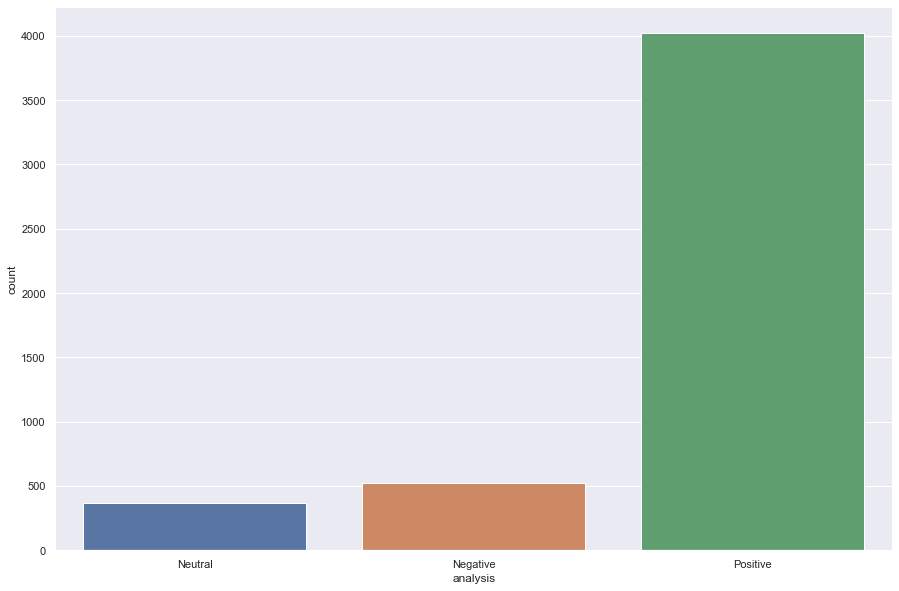

In [75]:
x = sns.countplot(x="analysis", data=df)
sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(style='darkgrid')

3. Output - Conclusion:

-Overall, tech sales on Amazon has received "positive" feedback from customers.

-There are always rooms for improvement with > 500 negative reviews. Apparently, it is much easier to deal with 500 of them instead of around 4900 reviews. 

-This project would be helpful for any businesses that would like to analyze and generate insights from its customers' reviews